In [1]:
# Input info
#se_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/SE.rds"
# outdir = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/cluster_clone_counts_donors/"
# se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v02/CHIP_b1/MTBlacklist_A2/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_init/knn/kparam_3/gff_A2_black/annotation_clones/se_cells_meta_labels.tsv"
input_col = "Input"
# use_input = False
# min_cell = 10

outdir = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/gff_hg38_1_2/annotation_clones/cluster_clone_counts/sepDonors"
se_cells_meta_f = "/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/gff_hg38_1_2/annotation_clones/se_cells_meta_labels.tsv"
use_input = True
min_cell = 10

In [2]:
def keep_top_clones(df, n_top=None, min_cell=0):
    df = df.sort_values("ncells",ascending=False)
    if n_top is not None:
        df = df[:n_top]
    return df.loc[df["ncells"]>min_cell]

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import colorcet as cc
%matplotlib inline
import numpy as np

In [4]:
sns.set_context("paper", font_scale=2.5)

In [5]:
se_cells_meta = pd.read_csv(se_cells_meta_f, sep='\t')
if "cluster_labels" in se_cells_meta.columns:
    se_cells_meta = se_cells_meta.rename({"cluster_labels":"nuclear_clusters"}, axis=1)
else:
    se_cells_meta = se_cells_meta.rename({"seurat_clusters":"nuclear_clusters"}, axis=1)

palette = sns.color_palette(cc.glasbey, n_colors=len(se_cells_meta["nuclear_clusters"].unique()))
hue_order = se_cells_meta.groupby("nuclear_clusters").size().sort_values()[::-1].index
color_d = {key:val for key, val in zip(hue_order, palette)}

se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Input_AAACGAAAGGAAACTT-1,Input,2831,2831,49701.0,5002,164,92,1138,37812,5493,...,2,3505,2884,AAACGAAAGGAAACTT-1_Input,Input_AAACGAAAGGAAACTT-1,28,2,Input,2_28,2
Input_AAACGAAGTCCAAGAG-1,Input,4565,4565,62869.0,9096,249,139,1902,42086,9397,...,0,6161,4469,AAACGAAGTCCAAGAG-1_Input,Input_AAACGAAGTCCAAGAG-1,6,0,Input,0_6,0
Input_AAACGAAGTCCGAGCT-1,Input,7229,7229,60574.0,11583,352,141,2087,31767,14644,...,1,9778,6201,AAACGAAGTCCGAGCT-1_Input,Input_AAACGAAGTCCGAGCT-1,2,0,Input,0_2,1
Input_AAACGAAGTTCAGAAA-1,Input,2846,2846,32202.0,4591,146,90,911,19849,6615,...,0,3786,2952,NaN,Input_AAACGAAGTTCAGAAA-1,None,None,None,None,0
Input_AAACGAAGTTTGAAGA-1,Input,7001,7001,68829.0,12010,432,163,2209,39985,14030,...,1,9266,5942,AAACGAAGTTTGAAGA-1_Input,Input_AAACGAAGTTTGAAGA-1,9,2,Input,2_9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Flt3l_TTTGAGGAGTCTCGAT-1,Flt3l,10815,10815,216547.0,60590,1237,834,8682,126811,18393,...,9,14395,7821,TTTGAGGAGTCTCGAT-1_Flt3l,Flt3l_TTTGAGGAGTCTCGAT-1,51,0,Flt3l,0_51,9
Flt3l_TTTGAGGGTTGCAGAG-1,Flt3l,11111,11111,182438.0,70126,1239,878,9648,79591,20956,...,9,16707,8735,TTTGAGGGTTGCAGAG-1_Flt3l,Flt3l_TTTGAGGGTTGCAGAG-1,32,0,Flt3l,0_32,9
Flt3l_TTTGGTTCAAGTCTGT-1,Flt3l,4618,4618,71329.0,26995,373,376,3392,32560,7633,...,14,6182,4252,NaN,Flt3l_TTTGGTTCAAGTCTGT-1,None,None,None,None,14
Flt3l_TTTGGTTCATTCACGA-1,Flt3l,735,735,30944.0,15611,259,247,1705,11307,1815,...,12,1069,933,NaN,Flt3l_TTTGGTTCATTCACGA-1,None,None,None,None,12


### Remove None before normalizing

In [6]:
if use_input:
    se_cells_meta = se_cells_meta[se_cells_meta["orig.ident"] == input_col]
se_cells_meta = se_cells_meta[se_cells_meta["donor"] != "None"]
se_cells_meta

,orig.ident,nCount_ATAC,nFeature_ATAC,total,duplicate,chimeric,unmapped,lowmapq,mitochondrial,passed_filters,...,seurat_clusters,nCount_RNA,nFeature_RNA,ID,Row.names,lineage,donor,condition,name,nuclear_clusters
Input_AAACGAAAGGAAACTT-1,Input,2831,2831,49701.0,5002,164,92,1138,37812,5493,...,2,3505,2884,AAACGAAAGGAAACTT-1_Input,Input_AAACGAAAGGAAACTT-1,28,2,Input,2_28,2
Input_AAACGAAGTCCAAGAG-1,Input,4565,4565,62869.0,9096,249,139,1902,42086,9397,...,0,6161,4469,AAACGAAGTCCAAGAG-1_Input,Input_AAACGAAGTCCAAGAG-1,6,0,Input,0_6,0
Input_AAACGAAGTCCGAGCT-1,Input,7229,7229,60574.0,11583,352,141,2087,31767,14644,...,1,9778,6201,AAACGAAGTCCGAGCT-1_Input,Input_AAACGAAGTCCGAGCT-1,2,0,Input,0_2,1
Input_AAACGAAGTTTGAAGA-1,Input,7001,7001,68829.0,12010,432,163,2209,39985,14030,...,1,9266,5942,AAACGAAGTTTGAAGA-1_Input,Input_AAACGAAGTTTGAAGA-1,9,2,Input,2_9,1
Input_AAACGAATCCCAGTAA-1,Input,2103,2103,30056.0,2764,124,63,832,22385,3888,...,2,2540,2215,AAACGAATCCCAGTAA-1_Input,Input_AAACGAATCCCAGTAA-1,0,3,Input,3_0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Input_TTTGTGTCATTCTTTG-1,Input,2387,2387,30729.0,3557,194,72,1001,21864,4041,...,4,2847,2381,TTTGTGTCATTCTTTG-1_Input,Input_TTTGTGTCATTCTTTG-1,0,1,Input,1_0,4
Input_TTTGTGTTCAAGAGGC-1,Input,4945,4945,39295.0,7900,240,121,1843,18816,10375,...,0,6713,4797,TTTGTGTTCAAGAGGC-1_Input,Input_TTTGTGTTCAAGAGGC-1,0,1,Input,1_0,0
Input_TTTGTGTTCGCAGATT-1,Input,2542,2542,40307.0,4337,118,86,1048,29754,4964,...,2,3172,2671,TTTGTGTTCGCAGATT-1_Input,Input_TTTGTGTTCGCAGATT-1,6,2,Input,2_6,2
Input_TTTGTGTTCGCTATAG-1,Input,10021,10021,48236.0,10241,386,208,2707,15325,19369,...,1,12311,7335,TTTGTGTTCGCTATAG-1_Input,Input_TTTGTGTTCGCTATAG-1,0,3,Input,3_0,1


## boxenplot and violin of clone sizes across cluster

In [7]:
clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)

clone_counts

,name,nuclear_clusters,donor,ncells
0,0_0,0,0,2
1,0_0,1,0,34
2,0_0,2,0,10
3,0_0,3,0,14
4,0_0,4,0,9
...,...,...,...,...
1175,3_9,0,3,1
1176,3_9,1,3,2
1177,3_9,2,3,1
1178,3_9,4,3,1


In [8]:
for don, val in clone_counts.groupby("donor"):
    val.pivot(index="name", columns="nuclear_clusters", values="ncells").fillna(0).to_csv(join(outdir, f"donor{don}.clone_clust.csv"))

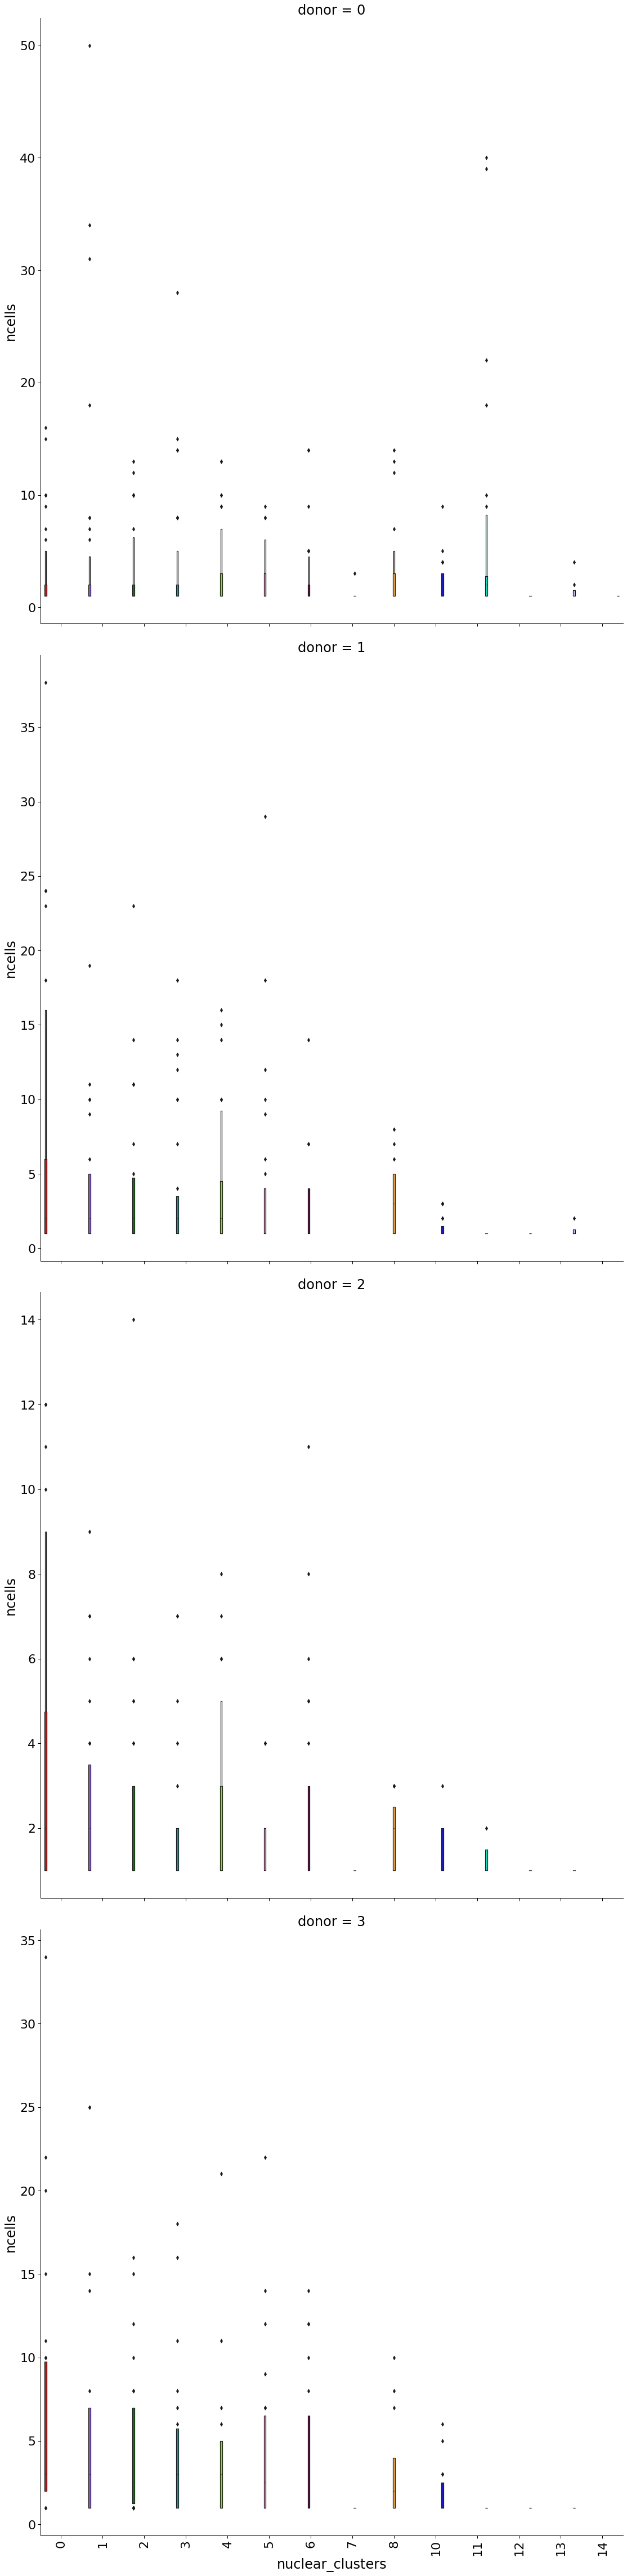

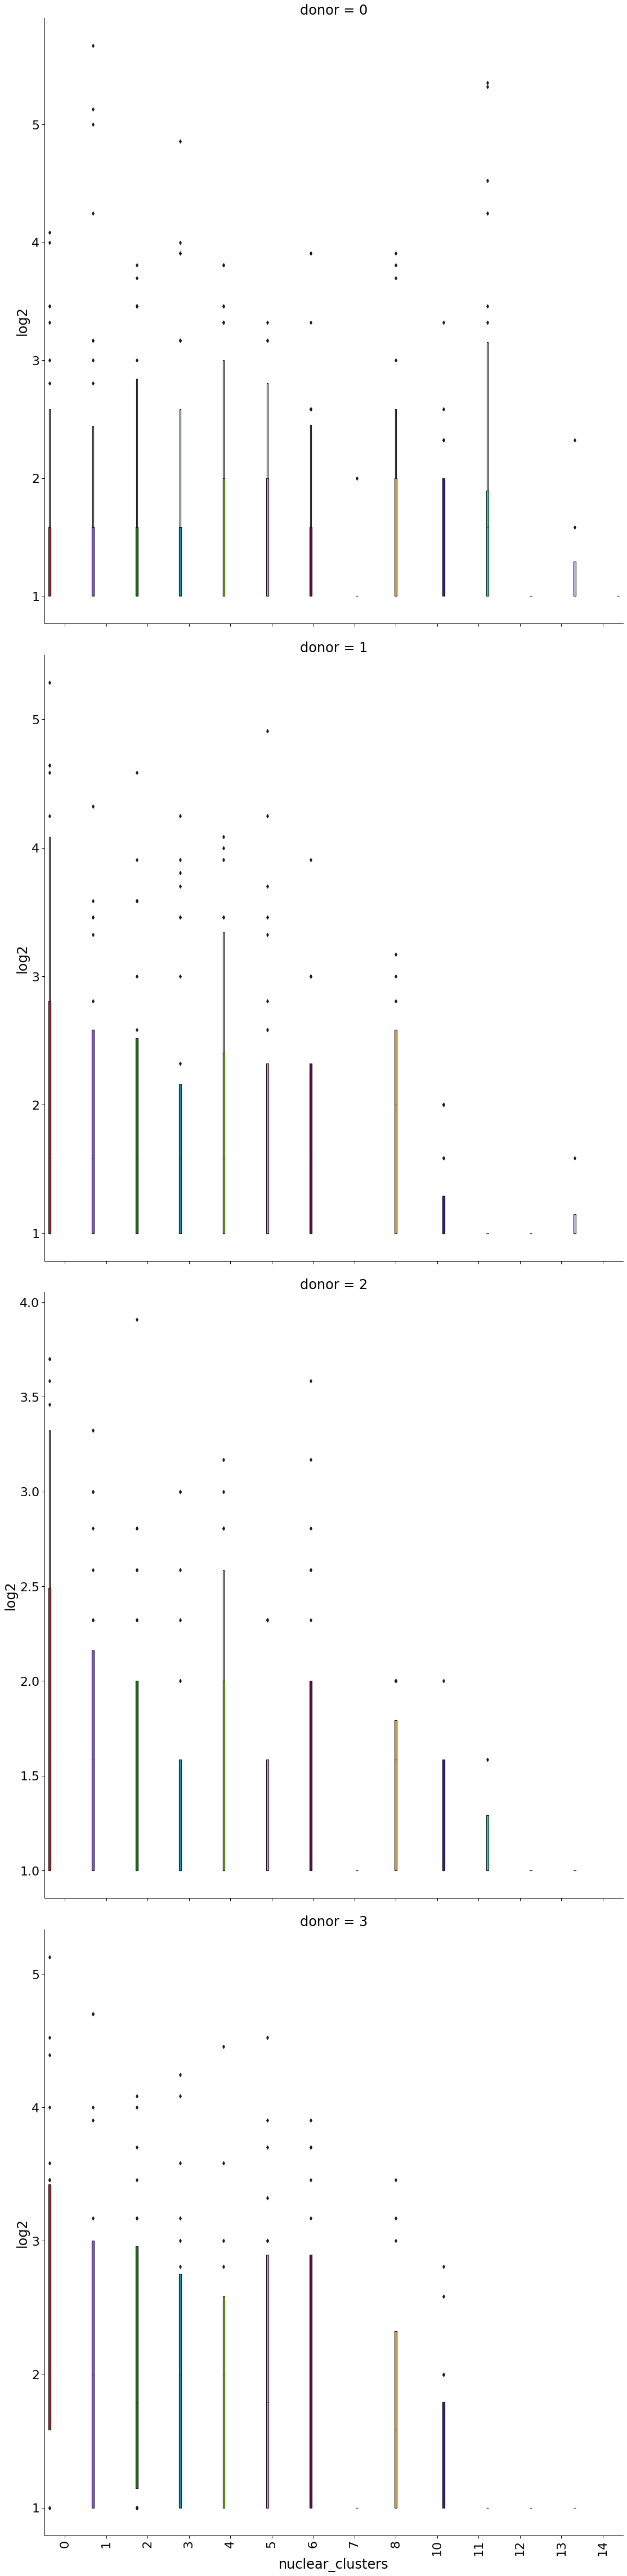

In [9]:

sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, sharey=False,
            row="donor", kind="boxen", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order)
# sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, sharey=False,
#             row="donor", kind="boxen", height=16, hue="nuclear_clusters", outlier_prop=0.001, showfliers=False,
#             palette=palette, hue_order=hue_order, dodge=True)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "clone_cluster_boxen_diffY.svg"))
plt.savefig(join(outdir, "clone_cluster_boxen_diffY.pdf"))


clone_counts["log2"] = np.log2(1+clone_counts["ncells"]).fillna(0)
sns.catplot(x="nuclear_clusters", y="log2", data=clone_counts, sharey=False,
            row="donor", kind="boxen", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order)

plt.xticks(rotation=90)
plt.savefig(join(outdir, "log2_clone_cluster_boxen_diffY.svg"))
plt.savefig(join(outdir, "log2_clone_cluster_boxen_diffY.pdf"))




In [10]:
join(outdir, "log2_clone_cluster_boxen_diffY.svg")


'/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/gff_hg38_1_2/annotation_clones/cluster_clone_counts/sepDonors/log2_clone_cluster_boxen_diffY.svg'

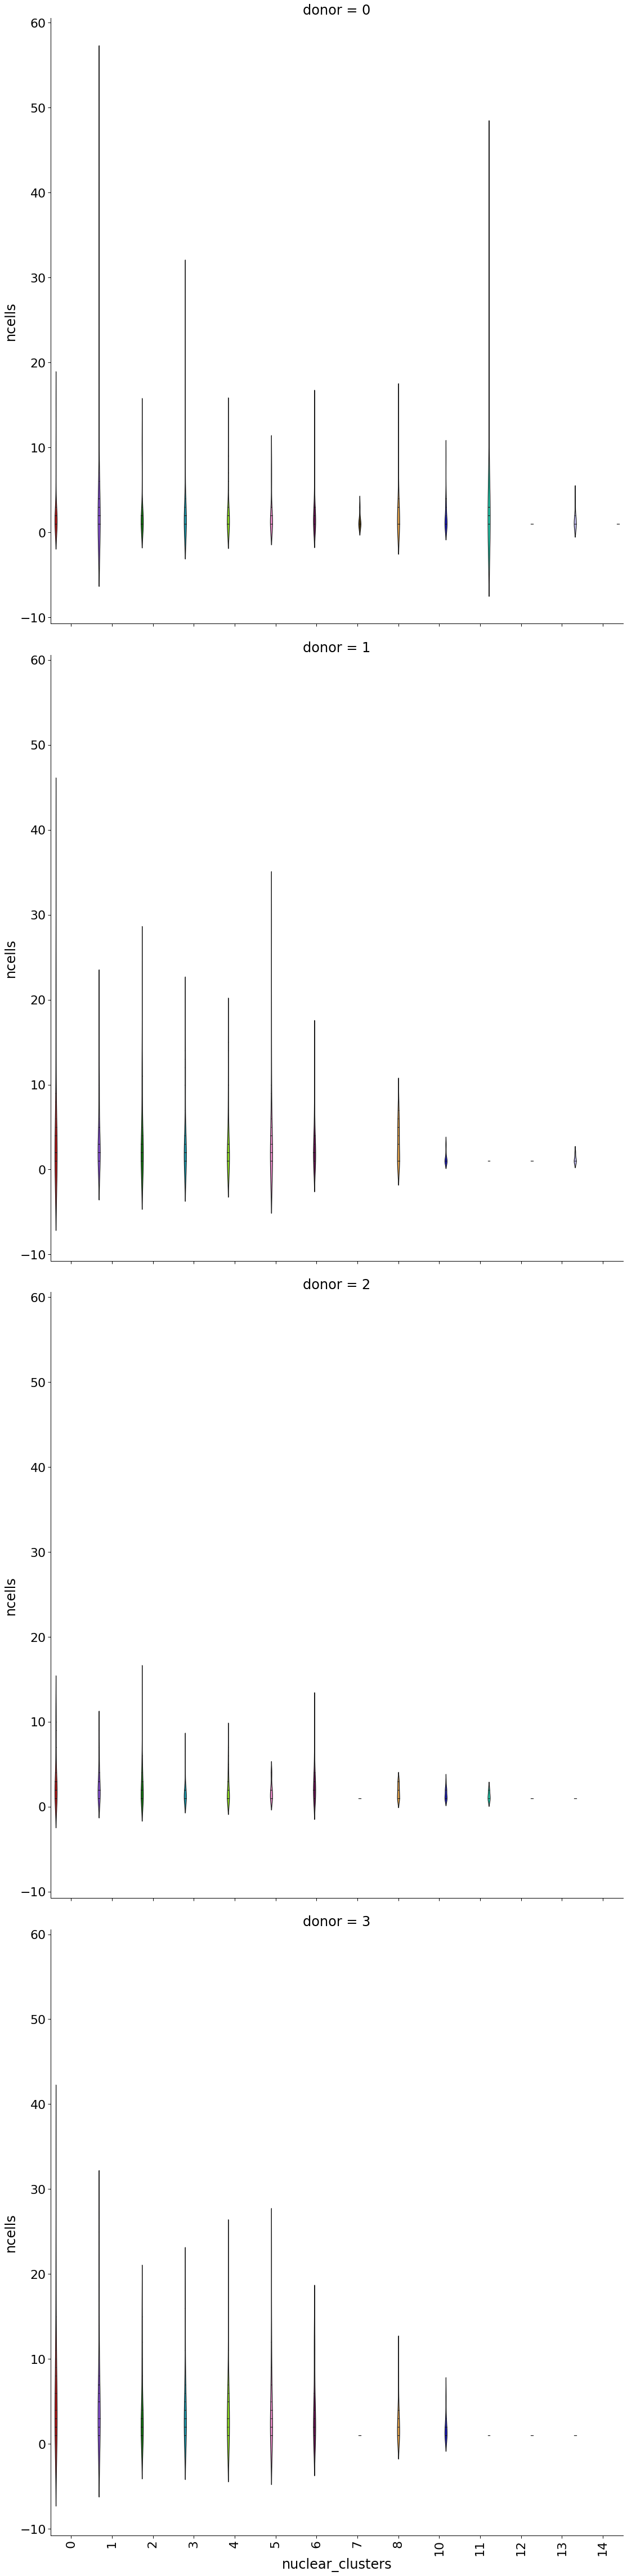

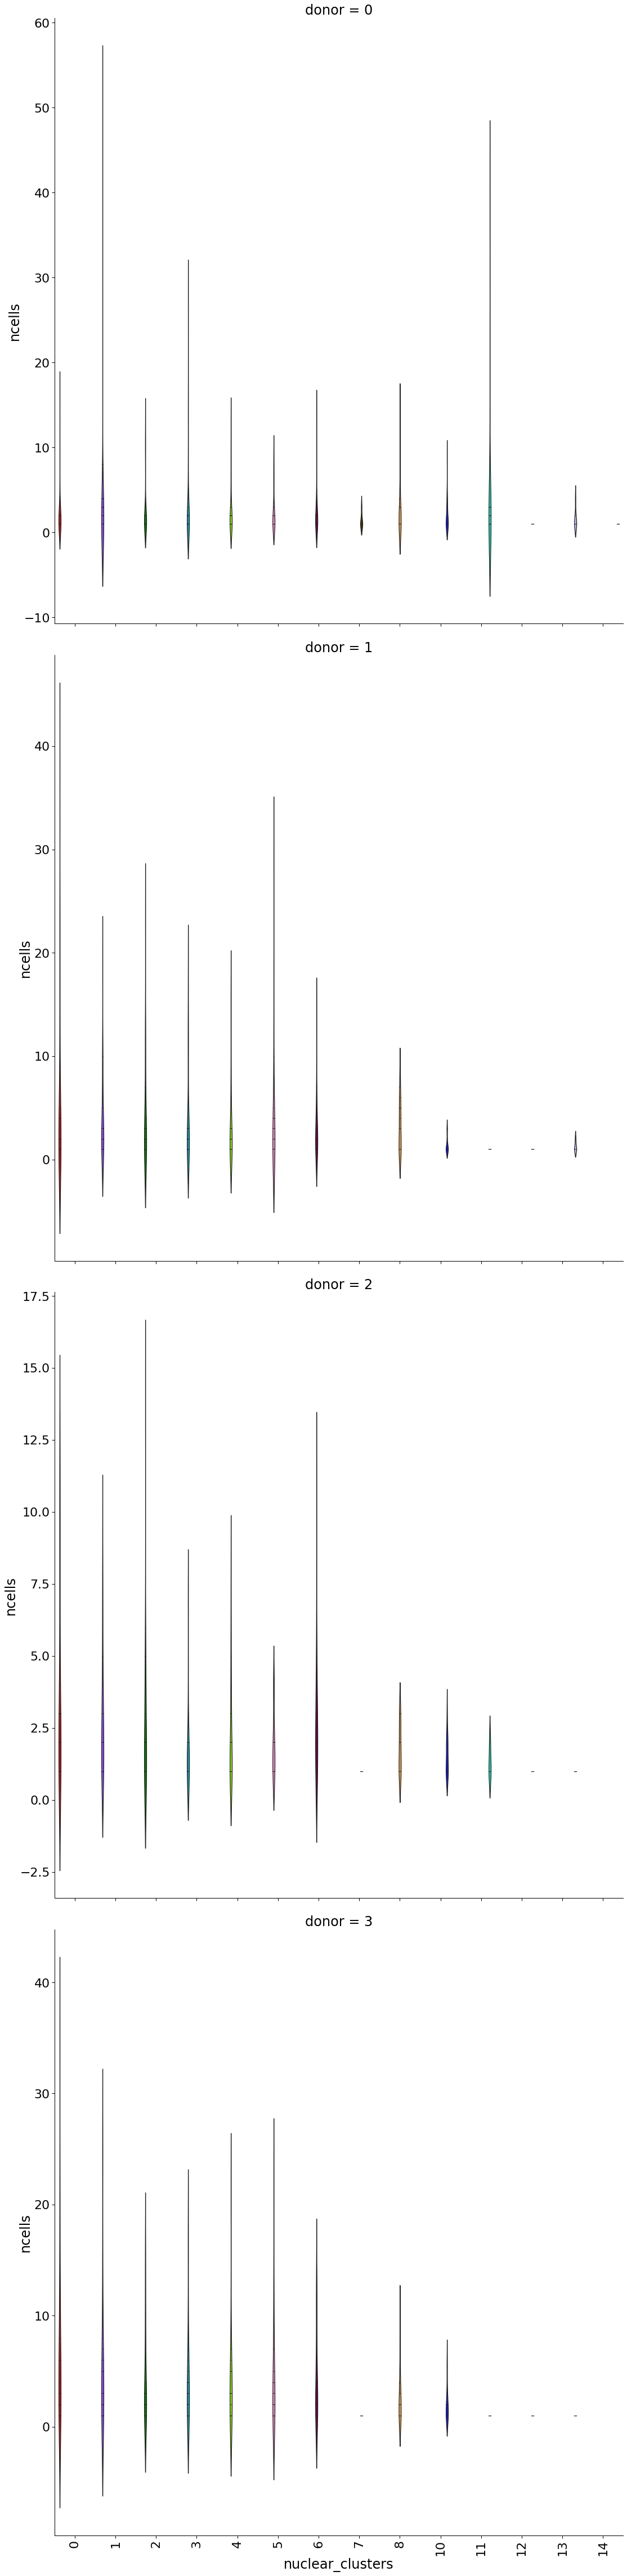

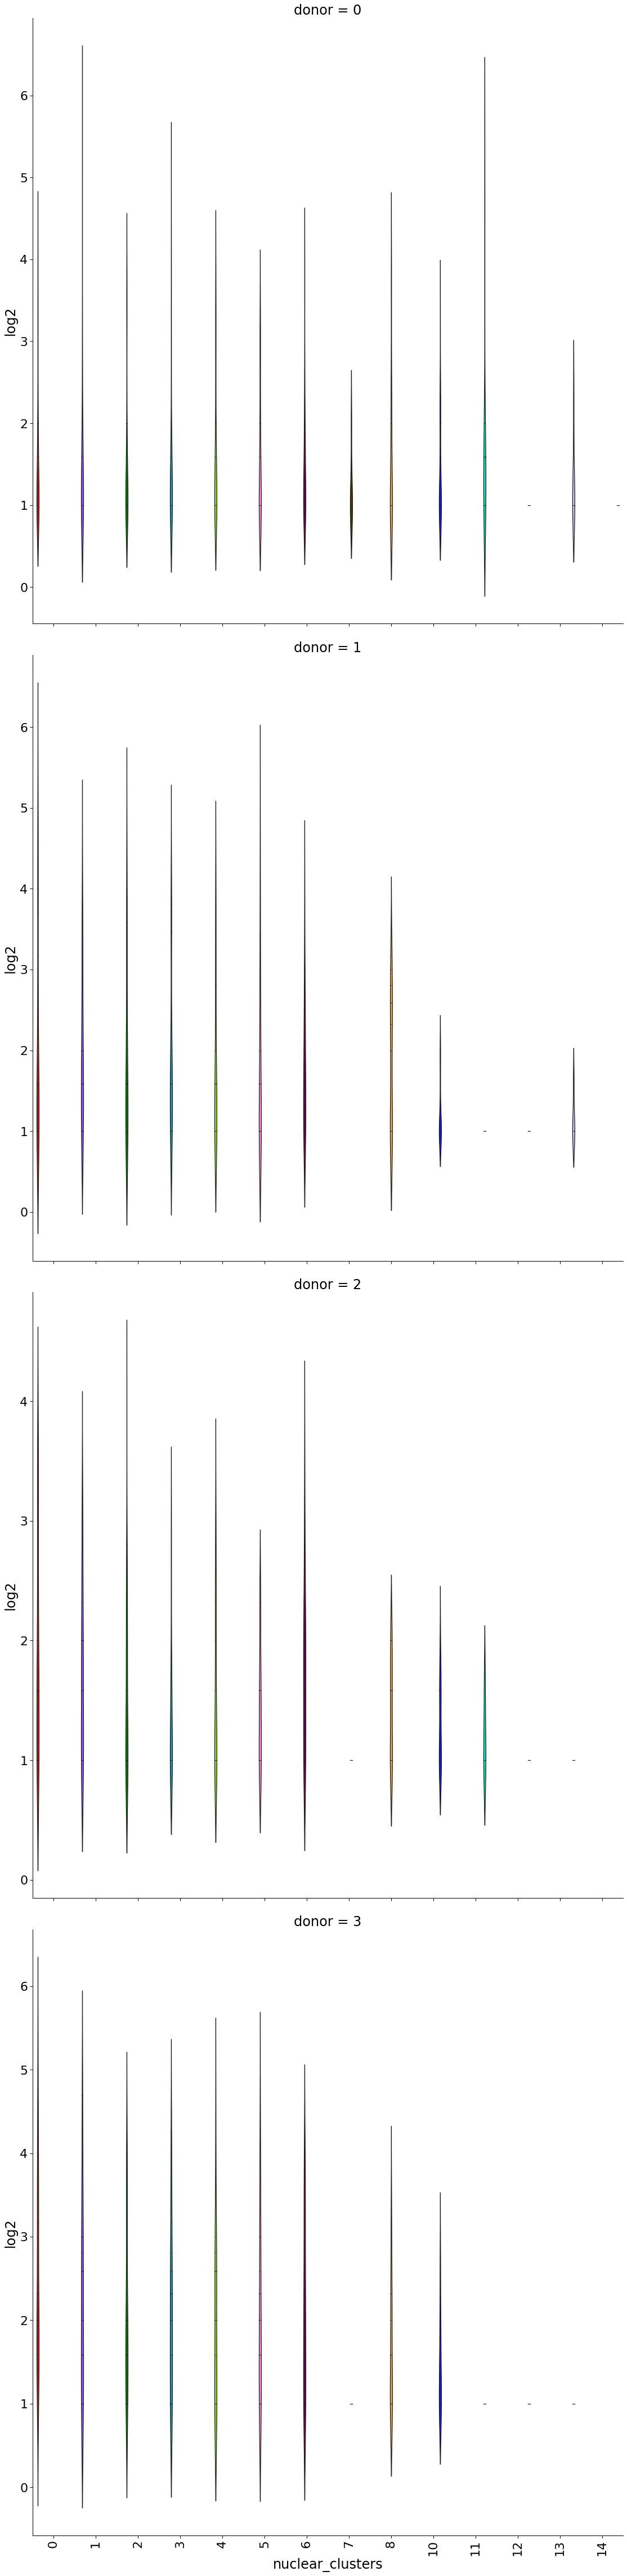

In [11]:

sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, inner='stick',
            hue="nuclear_clusters", palette=palette, hue_order=hue_order,
            row="donor", kind="violin", height=16)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "clone_cluster_box.svg"))
plt.savefig(join(outdir, "clone_cluster_box.pdf"))


sns.catplot(x="nuclear_clusters", y="ncells", data=clone_counts, inner='stick', sharey=False,
            row="donor", kind="violin", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order,)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "clone_cluster_box_diffY.svg"))
plt.savefig(join(outdir, "clone_cluster_box_diffY.pdf"))




sns.catplot(x="nuclear_clusters", y="log2", data=clone_counts, inner='stick', sharey=False,
            row="donor", kind="violin", height=16, hue="nuclear_clusters",
            palette=palette, hue_order=hue_order,)
plt.xticks(rotation=90)
plt.savefig(join(outdir, "log2_clone_cluster_box_diffY.svg"))
plt.savefig(join(outdir, "log2_clone_cluster_box_diffY.pdf"))


## Plot counts for each donor

In [12]:
len(hue_order)

15

In [13]:
palette

[(0.8392156862745098, 0.0, 0.0),
 (0.5490196078431373, 0.23137254901960785, 1.0),
 (0.00392156862745098, 0.5294117647058824, 0.0),
 (0.0, 0.6745098039215687, 0.7764705882352941),
 (0.592156862745098, 1.0, 0.0),
 (1.0, 0.49411764705882355, 0.8196078431372549),
 (0.4196078431372549, 0.0, 0.30980392156862746),
 (1.0, 0.6470588235294118, 0.1843137254901961),
 (0.3411764705882353, 0.23137254901960785, 0.0),
 (0.0, 0.33725490196078434, 0.34901960784313724),
 (0.0, 0.0, 0.8666666666666667),
 (0.0, 0.9921568627450981, 0.8117647058823529),
 (0.6313725490196078, 0.4588235294117647, 0.4117647058823529),
 (0.7372549019607844, 0.7137254901960784, 1.0),
 (0.5843137254901961, 0.7098039215686275, 0.4666666666666667)]

In [14]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "donor"]).size()

tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).fillna(0)
tmp

nuclear_clusters,0,1,2,3,4,5,6,7,8,10,11,12,13,14
donor,,,,,,,,,,,,,,
0,148.0,243.0,157.0,173.0,158.0,80.0,111.0,7.0,95.0,59.0,196.0,1.0,11.0,3.0
1,243.0,107.0,113.0,126.0,129.0,129.0,60.0,0.0,53.0,27.0,1.0,2.0,5.0,0.0
2,135.0,77.0,81.0,58.0,91.0,29.0,79.0,2.0,20.0,17.0,4.0,1.0,1.0,0.0
3,186.0,150.0,101.0,103.0,81.0,105.0,91.0,3.0,63.0,31.0,3.0,2.0,4.0,0.0


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6


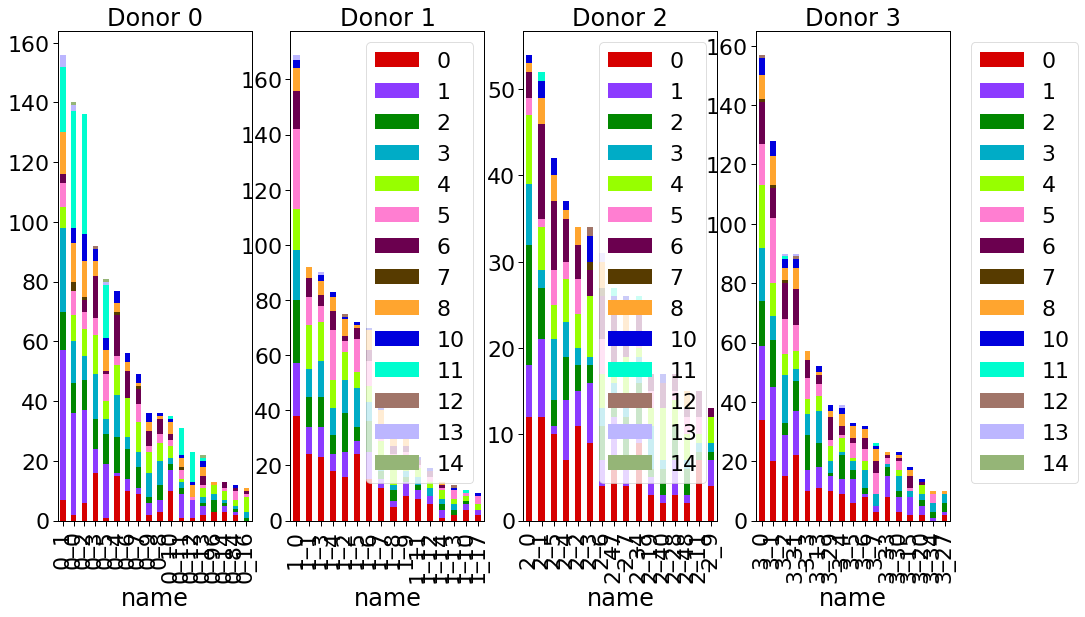

In [15]:
f, ax = plt.subplots(figsize=(16,9))
tmp.loc[:, [x for x in hue_order if x in tmp.columns]].plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "all_clones_barplot_clones.pdf"))

### Normalize to each donor
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters", index="donor", values=0).fillna(0)
f, ax = plt.subplots(figsize=(16,9))
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.png"))
plt.savefig(join(outdir, "norm_all_clones_barplot_clones.pdf"))

def donor_plots(df, name):
    donors = df["donor"].unique()
    f, ax = plt.subplots(figsize=(16,9), ncols=len(donors), squeeze=False)
    count = 0
    for d, val in df.groupby("donor"):
        val.drop(["ncells", "donor"],axis=1).plot.bar(stacked=True, ax=ax[0, count], color=color_d)
        ax[0, count].set_title(f"Donor {d}")
        count += 1
        
    if len(df["donor"].unique()) >1:
        ax[0,0].get_legend().remove()
    plt.legend(bbox_to_anchor=(1.05,1))
    plt.savefig(join(outdir, name+".barplot.png"),bbox_to_anchor='tight')
    plt.savefig(join(outdir, name+".barplot.pdf"), dpi=300,bbox_to_anchor='tight')
    return

clone_counts = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_counts = clone_counts[~(clone_counts["name"]=="None")]
clone_counts_combined = clone_counts.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_counts[clone_counts["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_counts_df = pd.concat((clone_counts_combined, clone_counts_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_counts_df

clone_counts_filt_10_df = clone_counts_df.loc[clone_counts_df["ncells"]>=min_cell]


%matplotlib inline
donor_plots(clone_counts_filt_10_df,
      name="clone_cluster_counts")

# Normalize per clone

In [16]:
clone_sums = clone_counts.groupby("name").sum()["ncells"]
clone_sums

name
0_0      140
0_1      156
0_10      35
0_100      2
0_101      2
        ... 
3_5       33
3_6       32
3_7       26
3_8        6
3_9        6
Name: ncells, Length: 284, dtype: int64

In [17]:
clone_norm = clone_counts.copy()
clone_norm["ncells"] = clone_norm.apply(lambda x: x["ncells"]/clone_sums.loc[(x["name"])] , axis=1)

print("sum of normed values", clone_norm.groupby(["nuclear_clusters", "donor"]).sum()["ncells"])

#clone_norm = se_cells_meta.groupby(["name", "nuclear_clusters","donor"]).size().reset_index().rename({0:"ncells"}, axis=1)
clone_norm = clone_norm[~(clone_norm["name"]=="None")]
clone_norm_combined = clone_norm.groupby(["name", "donor"]).sum()["ncells"].reset_index().sort_values("ncells", ascending=False).set_index("name")
def get_clone_count(x):
    curr = clone_norm[clone_norm["name"]==x.name]
    return curr.set_index("nuclear_clusters")["ncells"]

clone_norm_df = pd.concat((clone_norm_combined, clone_norm_combined.apply(get_clone_count, axis=1)),axis=1).fillna(0)
clone_norm_df.head()


sum of normed values nuclear_clusters  donor
0                 0        16.064847
                  1        14.135848
                  2        11.227940
                  3         7.034732
1                 0        19.840818
                  1         5.235959
                  2         6.415722
                  3         5.035559
2                 0        17.047815
                  1         5.654124
                  2         6.305532
                  3         4.796007
3                 0        17.151859
                  1         8.147645
                  2         5.980783
                  3         3.400682
4                 0        18.329211
                  1         8.274331
                  2        11.628132
                  3         3.590830
5                 0         5.766042
                  1         7.473297
                  2         1.868362
                  3         3.834171
6                 0        12.633299
                  1         2.

,donor,ncells,0,1,2,3,4,5,6,7,8,10,11,12,13,14
name,,,,,,,,,,,,,,,,
0_0,0,1.0,0.014286,0.242857,0.071429,0.100000,0.064286,0.057143,0.000000,0.021429,0.092857,0.035714,0.278571,0.0,0.014286,0.007143
1_5,1,1.0,0.333333,0.069444,0.069444,0.194444,0.083333,0.166667,0.055556,0.000000,0.013889,0.013889,0.000000,0.0,0.000000,0.000000
1_56,1,1.0,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1_55,1,1.0,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1_54,1,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6


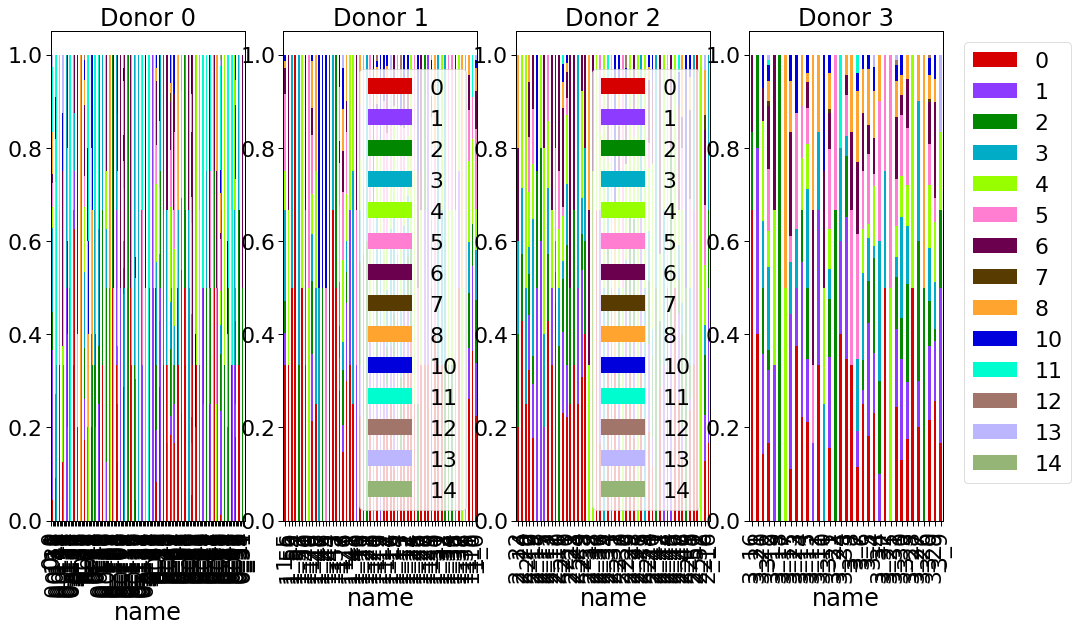

In [18]:
donor_plots(clone_norm_df,
      name="normalized_counts")

## Only top clones

In [19]:
cell_25 = keep_top_clones(clone_counts_filt_10_df, min_cell=min_cell).index

In [20]:
# from sklearn.datasets import make_blobs
# import colorcet as cc
# import matplotlib.pyplot as plt
# import seaborn as sns

#https://stackoverflow.com/questions/68209351/how-to-make-a-color-map-with-many-unique-colors-in-seaborn
#palette = sns.color_palette(cc.glasbey, n_colors=25)


/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6


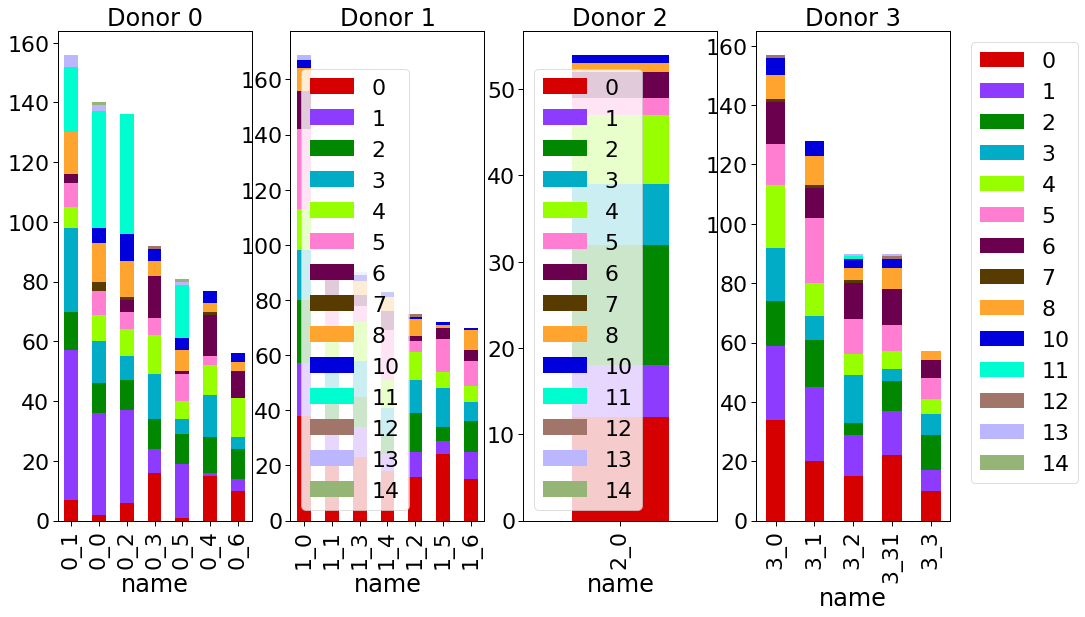

In [21]:
donor_plots(keep_top_clones(clone_counts_filt_10_df, n_top=20, min_cell=min_cell),
      name=f"top20_minCell{min_cell}_clone_cluster_counts")

/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6
/home/isaac/miniconda3/envs/mttrace/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox_to_anchor" which is no longer supported as of 3.3 and will become an error in 3.6


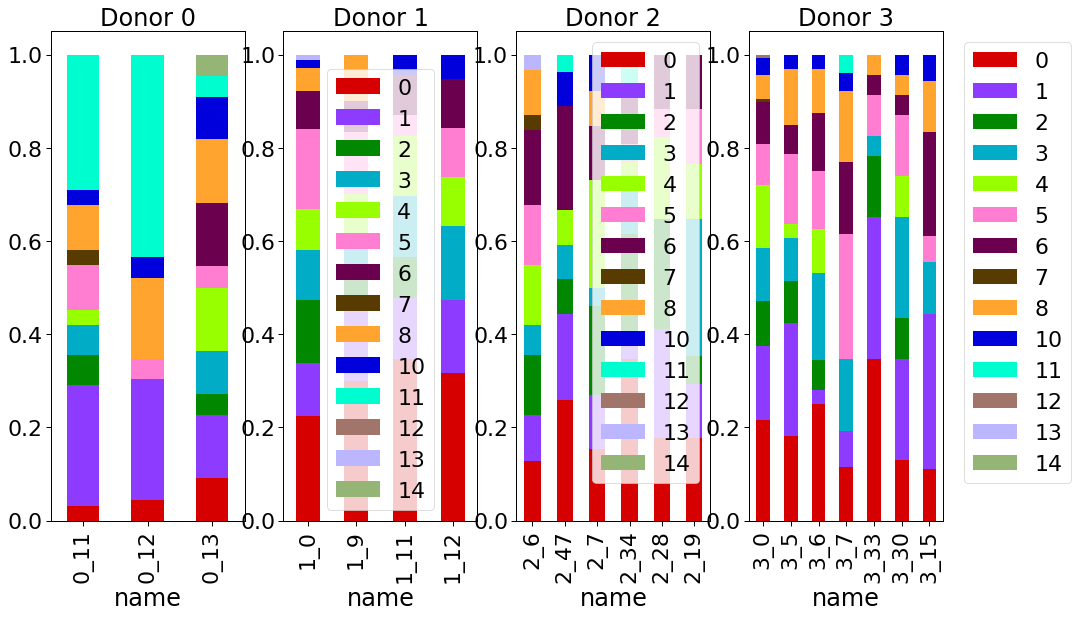

In [22]:
donor_plots(keep_top_clones(clone_norm_df.loc[cell_25], n_top=20, min_cell=0),
     name=f"top20_minCell{min_cell}_clone_normalized_counts")

---

## Group counts across donors and conditions and just conditions

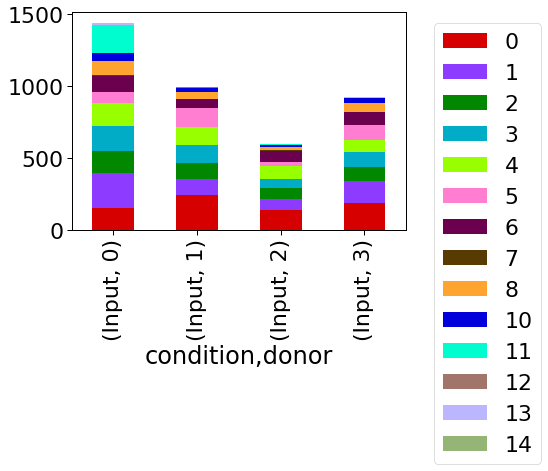

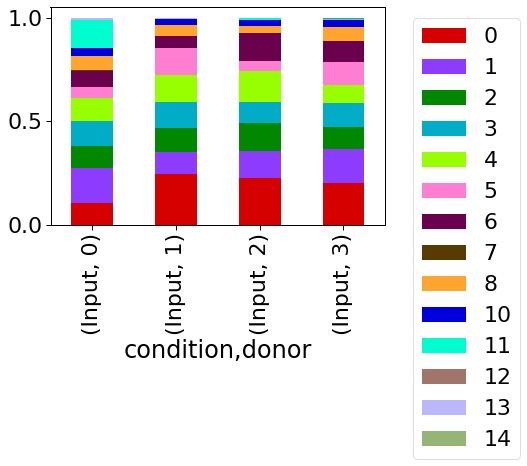

In [23]:
group_counts = se_cells_meta.groupby(["nuclear_clusters", "condition", "donor"]).size()
group_counts
f, ax = plt.subplots()
group_counts.reset_index().pivot(columns="nuclear_clusters", index=["condition", "donor"], values=0).plot.bar(stacked=True,
                                                                                                              color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, "all_conditions_clones_barplot_clones.pdf"))



### Normalize to each condition and donor
f, ax = plt.subplots()
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters",
                                       index=["condition","donor"], values=0)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True, color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_all_conditions_clones_barplot_clones.png"))
plt.savefig(join(outdir, "norm_all_conditions_clones_barplot_clones.pdf"))


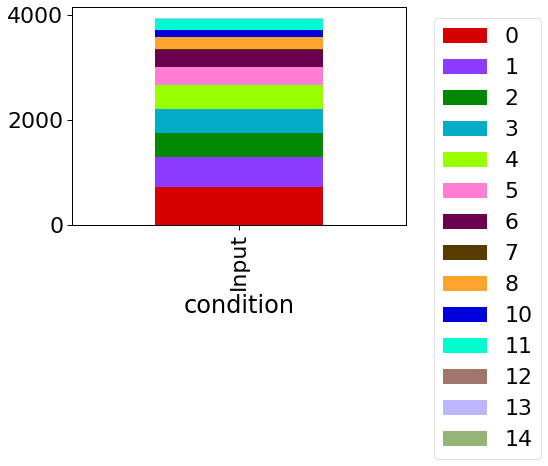

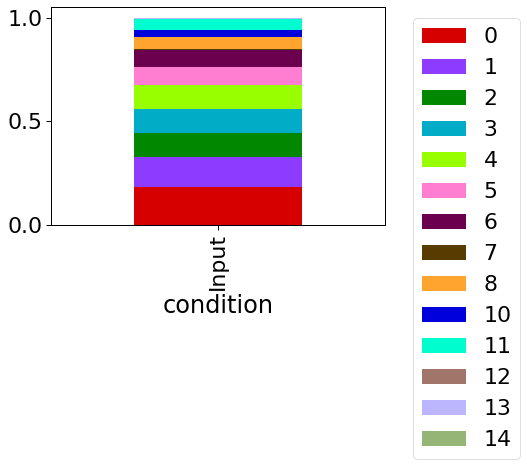

In [24]:
## Group counts across donors and conditions and just conditions
group_counts = se_cells_meta.groupby(["nuclear_clusters", "condition"]).size()
group_counts
f, ax = plt.subplots()
group_counts.reset_index().pivot(columns="nuclear_clusters", index=["condition"], values=0).plot.bar(stacked=True, 
                                                                                                     color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "conditions_barplot_clones.png"), bbox_inches='tight')
plt.savefig(join(outdir, "conditions_clones_barplot_clones.pdf"), bbox_inches='tight')


f, ax = plt.subplots()
### Normalize to each condition and donor
tmp = group_counts.reset_index().pivot(columns="nuclear_clusters",
                                       index=["condition"], values=0)
tmp.transpose().divide(tmp.sum(axis=1),axis='columns').transpose().plot.bar(stacked=True,color=color_d, ax = ax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.savefig(join(outdir, "norm_conditions_clones_barplot_clones.png"), bbox_inches='tight')
plt.savefig(join(outdir, "norm_conditions_clones_barplot_clones.pdf"), bbox_inches='tight')



---

---

---

In [25]:
outdir

'/data/Mito_Trace/output/pipeline/v04/CHIP_Input_nameFix_april08_2021/MTblacklist/data/merged/MT/cellr_True/numread_200/filters/minC10_minR50_topN0_hetT0.001_hetC10_hetCount5_bq20/mgatk/vireoIn/clones/variants_simpleUnion/knn/kparam_30/gff_hg38_1_2/annotation_clones/cluster_clone_counts/sepDonors'